In [2]:
import pandas as pd
from prophet import Prophet
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm

In [6]:
df = pd.read_csv(r'D:\NASSCOM data\HACK-NASSCOM\complete_merged.csv',index_col=0)
df.head()

,district,date,rain,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max
0,Adilabad,2018-01-01,0.0,11.200000,30.436842,25.721053,75.484211,0.236842,9.121053
1,Adilabad,2018-01-02,0.0,12.426316,33.621053,13.842105,57.284211,0.000000,9.094737
2,Adilabad,2018-01-03,0.0,20.131579,37.047368,15.736842,45.573684,0.000000,10.636842
3,Adilabad,2018-01-04,0.0,26.147368,40.431579,9.000000,72.452632,0.078947,15.726316
4,Adilabad,2018-01-05,0.0,29.168421,43.084211,11.384211,39.200000,0.252632,17.742105


In [7]:
import datetime as dt
df['date'] = pd.to_datetime(df['date'])

In [8]:
df_district = df.loc[df['district']=='Adilabad'].copy()
df_new = df_district.drop(columns=['district'])
train, test = train_test_split(df_new, test_size=0.2, shuffle=False)
test = test.reset_index(drop=True)

In [9]:
train

,date,rain,temp_min,temp_max,humidity_min,humidity_max,wind_speed_min,wind_speed_max
0,2018-01-01,0.000000,11.200000,30.436842,25.721053,75.484211,0.236842,9.121053
1,2018-01-02,0.000000,12.426316,33.621053,13.842105,57.284211,0.000000,9.094737
2,2018-01-03,0.000000,20.131579,37.047368,15.736842,45.573684,0.000000,10.636842
3,2018-01-04,0.000000,26.147368,40.431579,9.000000,72.452632,0.078947,15.726316
4,2018-01-05,0.000000,29.168421,43.084211,11.384211,39.200000,0.252632,17.742105
...,...,...,...,...,...,...,...,...
35389,2021-10-14,0.000000,21.283333,33.338889,46.105556,91.394444,0.000000,3.016667
35390,2021-10-15,0.000000,19.277778,33.166667,38.550000,91.705556,0.000000,4.511111
35391,2021-10-16,18.916667,22.544444,32.255556,48.550000,94.172222,0.000000,4.833333
35392,2021-10-17,18.916667,23.266667,28.916667,78.622222,96.650000,0.050000,4.311111


In [10]:
df_train = train.rename(columns={'temp_max': 'y', 'date':'ds'})
df_train['y_orig'] = df_train['y'] # to save a copy of the original data..you'll see why shortly. 
df_train['y'] = np.log(df_train['y'])

In [11]:
model = Prophet() #instantiate Prophet
model.fit(df_train)

21:25:48 - cmdstanpy - INFO - Chain [1] start processing
21:25:48 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
''' 'year': 'A',
        'quarter': 'Q',
        'month': 'M',
        'day': 'D',
        'hour': 'H',
        'minute': 'T',
        'second': 'S',
        'millisecond': 'L',
        'microsecond': 'U',
        'nanosecond': 'N'}
'''


# future_data = model.make_future_dataframe(periods=113, freq = 'D')
future_data = model.make_future_dataframe(periods=test.shape[0], freq = 'D')
forecast_data = model.predict(future_data)
forecast_data[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
1728,2022-09-26,3.402627,3.239185,3.542082
1729,2022-09-27,3.401114,3.245764,3.527229
1730,2022-09-28,3.402579,3.244462,3.543399
1731,2022-09-29,3.400290,3.236399,3.545506
1732,2022-09-30,3.392053,3.235658,3.537706


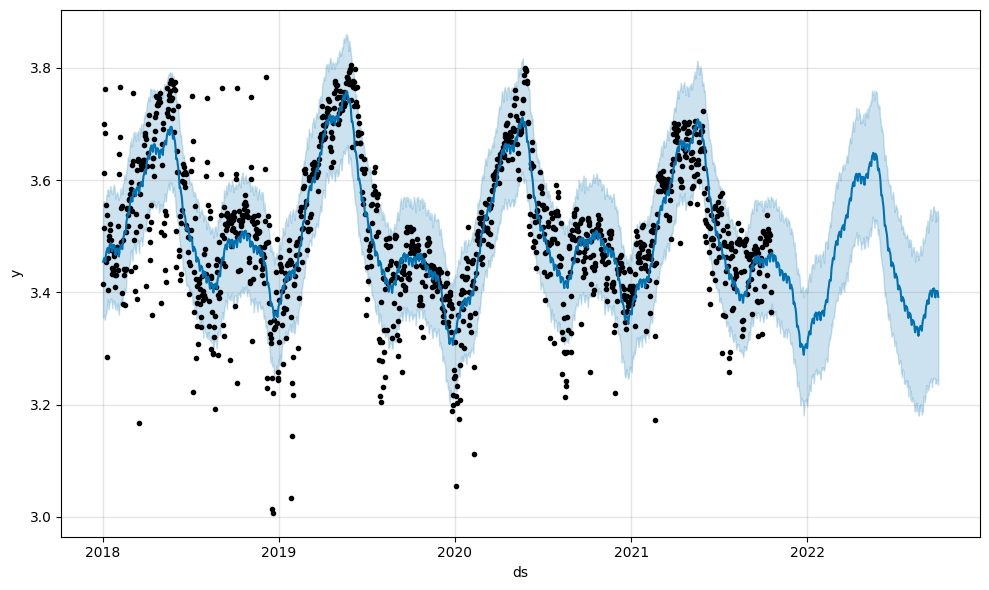

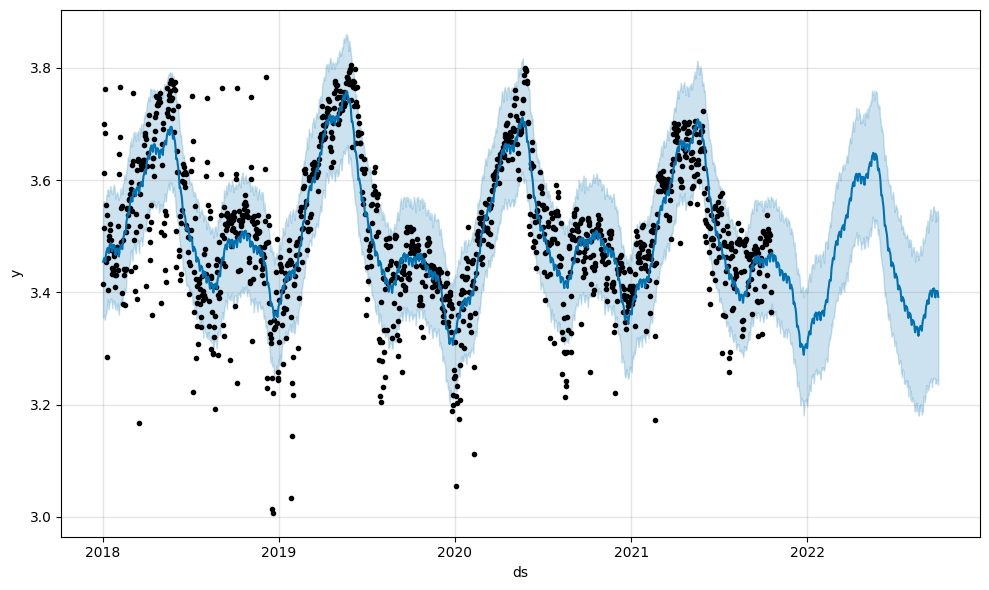

In [13]:
model.plot(forecast_data)

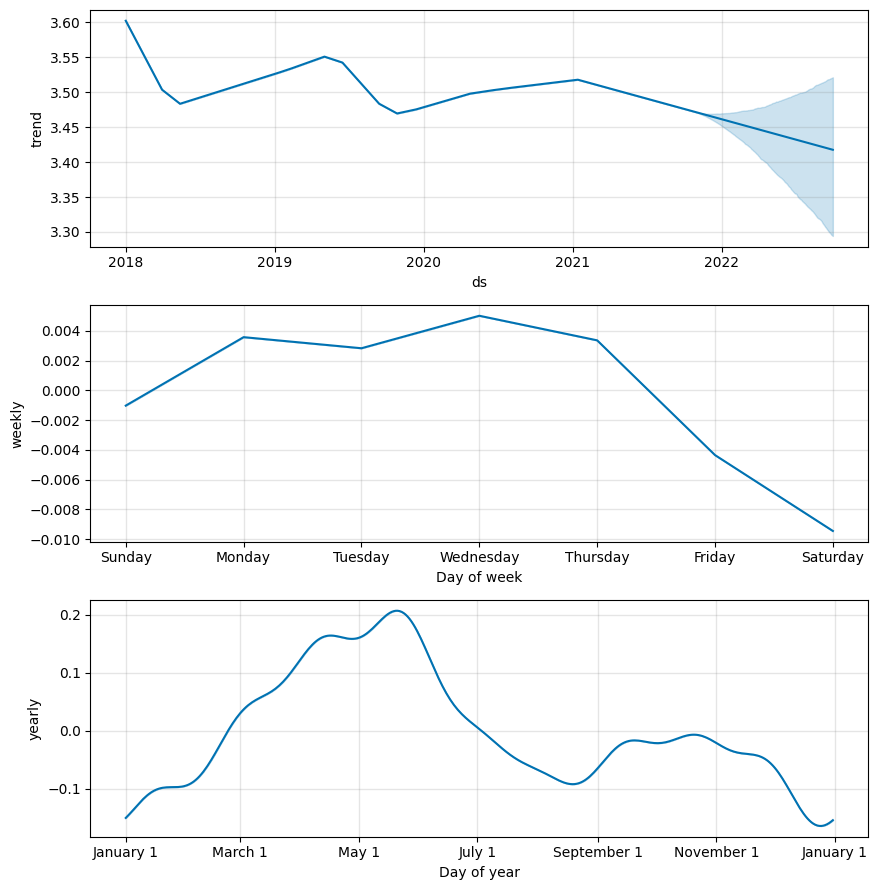

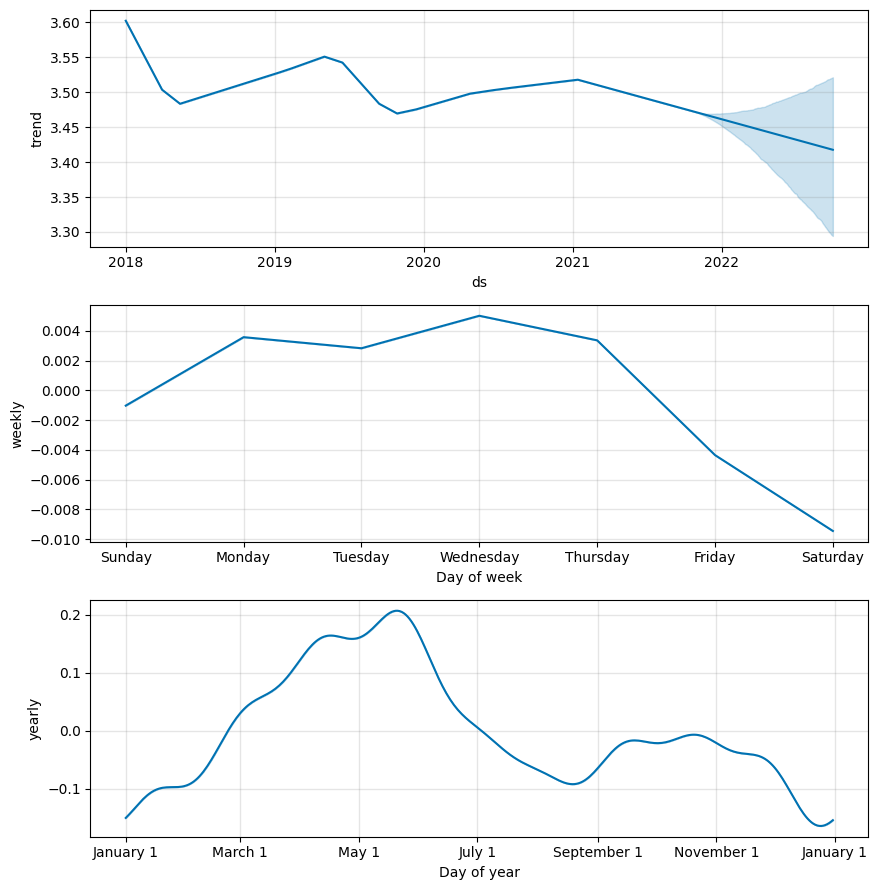

In [14]:
model.plot_components(forecast_data)

In [15]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

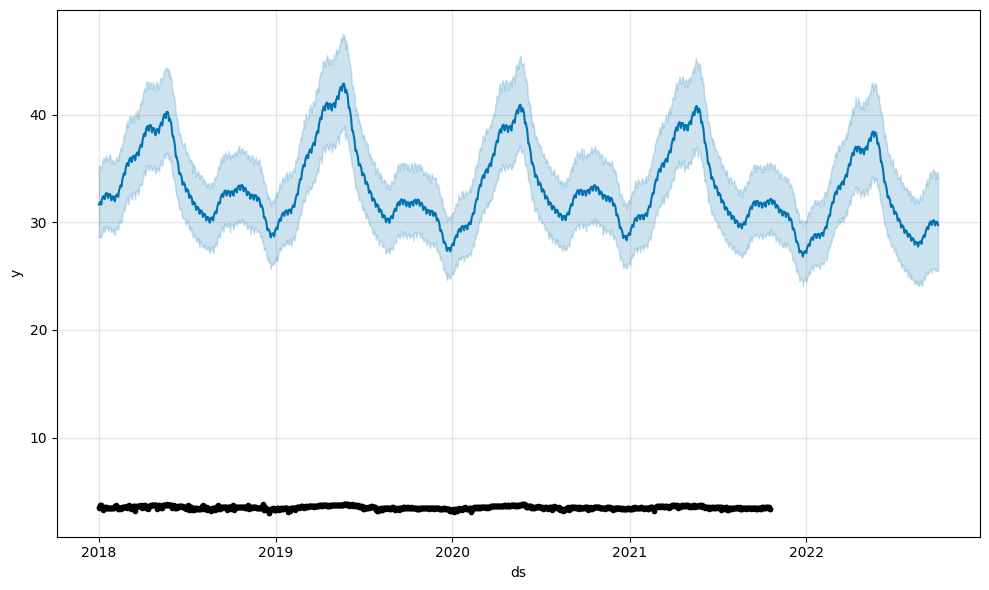

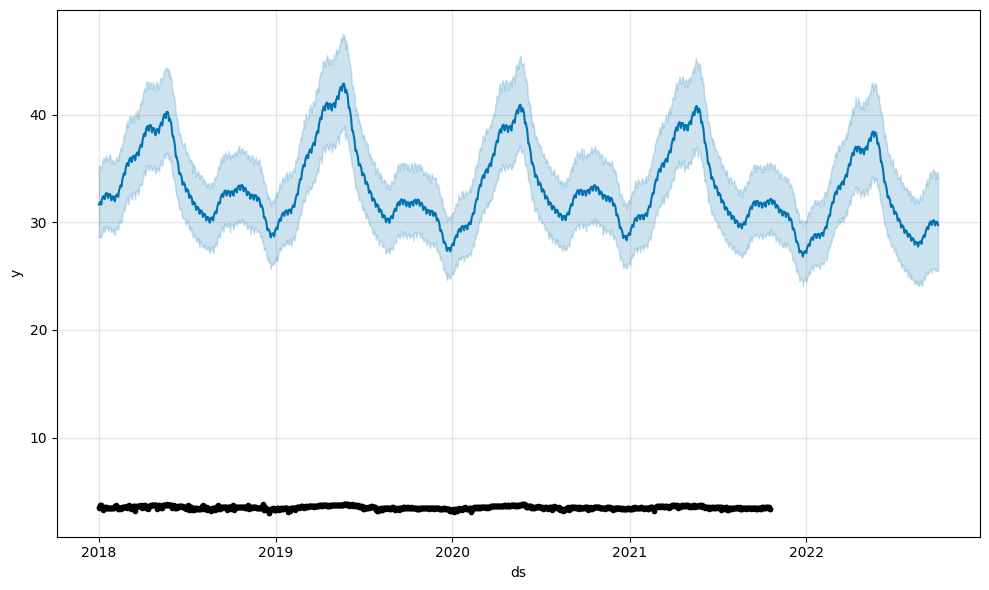

In [16]:
model.plot(forecast_data_orig)

In [17]:
df_train['y_log']=df_train['y'] #copy the log-transformed data to another column
df_train['y']=df_train['y_orig']     


In [18]:
df_train

,ds,rain,temp_min,y,humidity_min,humidity_max,wind_speed_min,wind_speed_max,y_orig,y_log
0,2018-01-01,0.000000,11.200000,30.436842,25.721053,75.484211,0.236842,9.121053,30.436842,3.415654
1,2018-01-02,0.000000,12.426316,33.621053,13.842105,57.284211,0.000000,9.094737,33.621053,3.515152
2,2018-01-03,0.000000,20.131579,37.047368,15.736842,45.573684,0.000000,10.636842,37.047368,3.612197
3,2018-01-04,0.000000,26.147368,40.431579,9.000000,72.452632,0.078947,15.726316,40.431579,3.699611
4,2018-01-05,0.000000,29.168421,43.084211,11.384211,39.200000,0.252632,17.742105,43.084211,3.763157
...,...,...,...,...,...,...,...,...,...,...
35389,2021-10-14,0.000000,21.283333,33.338889,46.105556,91.394444,0.000000,3.016667,33.338889,3.506725
35390,2021-10-15,0.000000,19.277778,33.166667,38.550000,91.705556,0.000000,4.511111,33.166667,3.501545
35391,2021-10-16,18.916667,22.544444,32.255556,48.550000,94.172222,0.000000,4.833333,32.255556,3.473690
35392,2021-10-17,18.916667,23.266667,28.916667,78.622222,96.650000,0.050000,4.311111,28.916667,3.364418


In [20]:
import plotly.graph_objs as go
import plotly.offline as py

import matplotlib.pyplot as plt
# import plotly.io as pio
# pio.renderers.default = "colab"

final_df = pd.DataFrame(forecast_data_orig)

#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df_train["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'

In [21]:
# Predict on training set with model
df_test = test.rename(columns={'date':'ds'})
df_test_results = model.predict(df_test)

In [22]:
df_test_results.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-10-19,3.473071,3.374885,3.566528,3.473071,3.473071,-0.004257,-0.004257,-0.004257,0.002837,0.002837,0.002837,-0.007094,-0.007094,-0.007094,0.0,0.0,0.0,3.468814
1,2021-10-20,3.472911,3.366331,3.571970,3.472911,3.472911,-0.001858,-0.001858,-0.001858,0.005020,0.005020,0.005020,-0.006878,-0.006878,-0.006878,0.0,0.0,0.0,3.471053
2,2021-10-21,3.472750,3.367743,3.576219,3.472750,3.472750,-0.003529,-0.003529,-0.003529,0.003368,0.003368,0.003368,-0.006898,-0.006898,-0.006898,0.0,0.0,0.0,3.469221
3,2021-10-22,3.472590,3.353555,3.556704,3.472590,3.472590,-0.011505,-0.011505,-0.011505,-0.004344,-0.004344,-0.004344,-0.007161,-0.007161,-0.007161,0.0,0.0,0.0,3.461085
4,2021-10-23,3.472430,3.360098,3.552290,3.472430,3.472430,-0.017116,-0.017116,-0.017116,-0.009444,-0.009444,-0.009444,-0.007672,-0.007672,-0.007672,0.0,0.0,0.0,3.455314


In [23]:
df_test_results['yhat'] = np.exp(df_test_results['yhat'])
df_test_results['yhat_lower'] = np.exp(df_test_results['yhat_lower'])
df_test_results['yhat_upper'] = np.exp(df_test_results['yhat_upper'])

In [67]:
df_test_results.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-10-19,3.470710,29.151695,35.286746,3.470710,3.470710,-0.003648,-0.003648,-0.003648,0.002820,0.002820,0.002820,-0.006469,-0.006469,-0.006469,0.0,0.0,0.0,32.042446
1,2021-10-20,3.470535,29.166178,35.678817,3.470535,3.470535,-0.001278,-0.001278,-0.001278,0.005013,0.005013,0.005013,-0.006291,-0.006291,-0.006291,0.0,0.0,0.0,32.112888
2,2021-10-21,3.470361,29.113116,35.645036,3.470361,3.470361,-0.002980,-0.002980,-0.002980,0.003368,0.003368,0.003368,-0.006348,-0.006348,-0.006348,0.0,0.0,0.0,32.052685
3,2021-10-22,3.470187,28.640130,35.160663,3.470187,3.470187,-0.010985,-0.010985,-0.010985,-0.004338,-0.004338,-0.004338,-0.006647,-0.006647,-0.006647,0.0,0.0,0.0,31.791594
4,2021-10-23,3.470012,28.492276,34.688544,3.470012,3.470012,-0.016622,-0.016622,-0.016622,-0.009432,-0.009432,-0.009432,-0.007191,-0.007191,-0.007191,0.0,0.0,0.0,31.607359


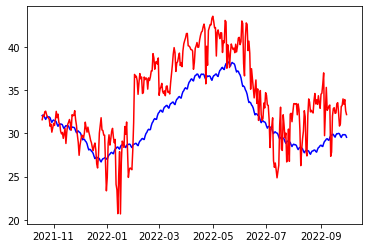

In [76]:
import matplotlib.pyplot as plt
plt.plot(df_test_results['ds'],df_test_results['yhat'], color = 'blue')   
plt.plot(test['date'],test['temp_max'], color='red')
plt.show()

In [24]:
r2_score(test['temp_max'], df_test_results['yhat'])

0.4150197803087833

In [25]:
from prophet.serialize import model_to_json, model_from_json

with open('serialized_model.json', 'w') as fout:
    fout.write(model_to_json(model))  # Save model

with open('serialized_model.json', 'r') as fin:
    m = model_from_json(fin.read())  # Load model


c:\ProgramData\Anaconda3\envs\ml-env\lib\site-packages\prophet\serialize.py:160: FutureWarning:

The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')

